In [21]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg

sys.path.append('/home/galm/software/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1366

In [3]:
k_cores = Doc.objects.filter(query=qid,k__isnull=False,cdo__citation__isnull=False).values('k').annotate(
    count = Count('pk')
)
k_cores = pd.DataFrame.from_dict(list(k_cores)).sort_values('k')

degrees = Doc.objects.filter(query=qid,k__isnull=False,cdo__citation__isnull=False).values('degree').annotate(
    count = Count('pk')
)
degrees = pd.DataFrame.from_dict(list(degrees)).sort_values('degree')

print(k_cores.head())

     count  k
107  39499  0
310  27085  1
181  27180  2
418  24439  3
269  24827  4


In [3]:
long_k = Doc.objects.filter(query=qid).values('k')

long_k = pd.DataFrame.from_dict(list(long_k))

long_data = Doc.objects.filter(query=qid).values('k','degree','eigen_cent')

long_data = pd.DataFrame.from_dict(list(long_data))

print(long_data.head())

     degree  eigen_cent       k
0  0.008089    0.001200   636.0
1  0.000114    0.000003    17.0
2  0.001202    0.000064   143.0
3  0.009572    0.001361  1037.0
4  0.000701    0.000063    95.0


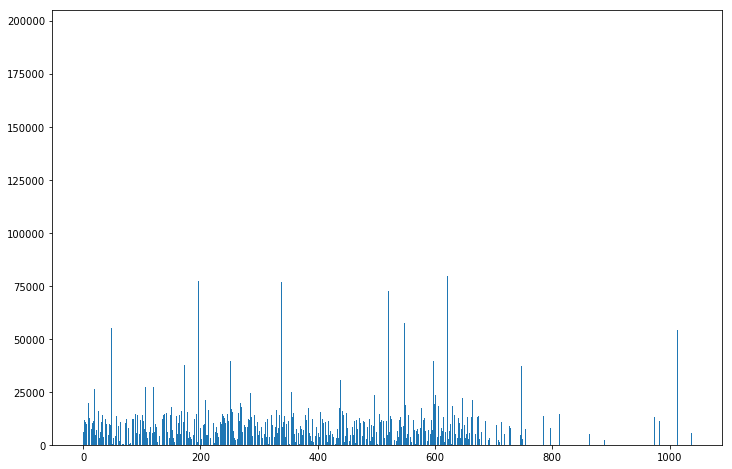

In [4]:
plt.rcParams["figure.figsize"] = [12,8]

plt.bar(k_cores.k,k_cores['count'])

plt.show()

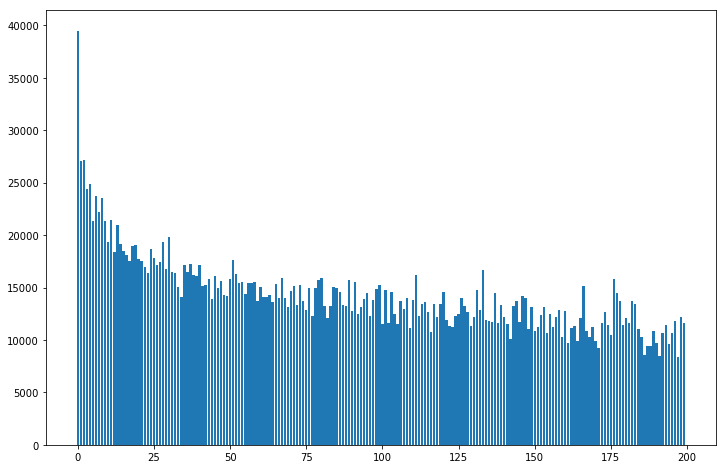

In [5]:
sub_k = k_cores[k_cores['k'] < 200]

plt.bar( sub_k['k'].values, sub_k['count'].values )

plt.show()

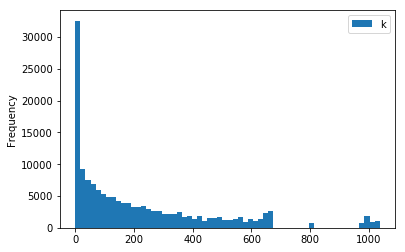

In [9]:
long_k.plot.hist(bins=60)

plt.show()

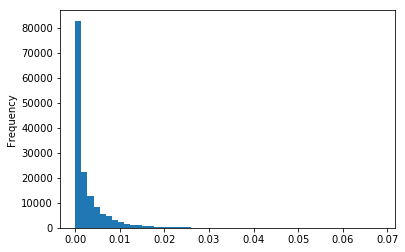

In [15]:
long_data['degree'].plot.hist(bins=50)

plt.show()

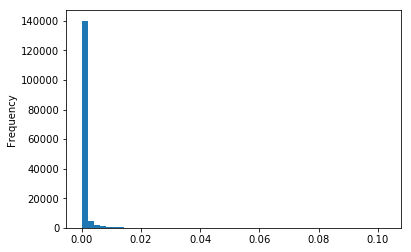

In [14]:
long_data['eigen_cent'].plot.hist(bins=50)

plt.show()

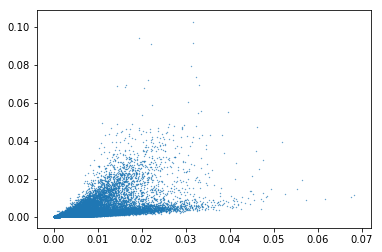

In [19]:
plt.scatter(long_data['degree'],long_data['eigen_cent'],s=0.1)
plt.show()

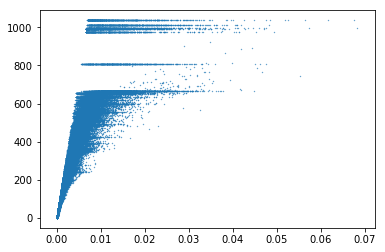

In [20]:
plt.scatter(long_data['degree'],long_data['k'],s=0.1)
plt.show()

In [25]:
dts = DocTopic.objects.filter(run_id=191,doc__query=qid,doc__k__isnull=False,doc__citation_objects=True).values('topic__title')

dts = dts.annotate(
    k = models.Avg('doc__k'),
    degree = models.Avg('doc__degree'),
    eigen_cent = models.Avg('doc__eigen_cent')
)
df =  pd.DataFrame.from_dict(list(dts))

In [26]:
df.head()

,degree,eigen_cent,k,topic__title
0,0.002567,0.000406,212.027699,"{acid, fatti, amino}"
1,0.004121,0.000883,298.792877,"{adapt, climat, mitig}"
2,0.002794,0.000558,235.150738,"{africa, south, african}"
3,0.003064,0.000570,249.579332,"{aggreg, concret, coars}"
4,0.003371,0.000562,264.263023,"{agricultur, intensif, input}"


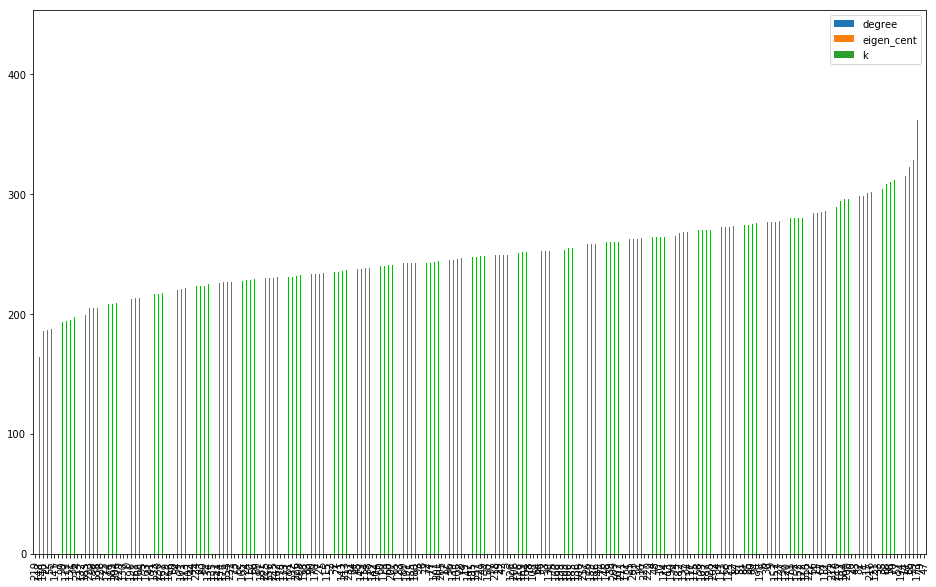

In [30]:
pdf = df.sort_values('k')

plt.rcParams["figure.figsize"] = [16,10]
pdf.plot.bar()
plt.show()

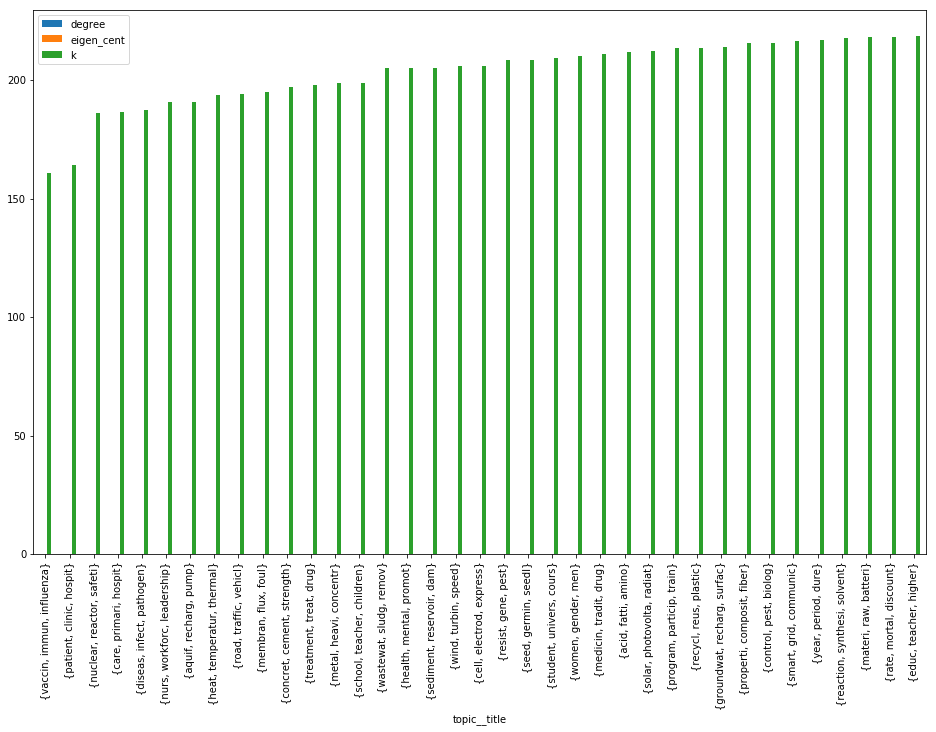

In [34]:
pdf = df.sort_values('k')

pdf = pdf[pdf['k'] < 220]
pdf = pdf.set_index('topic__title')

plt.rcParams["figure.figsize"] = [16,10]
pdf.plot.bar()
plt.show()

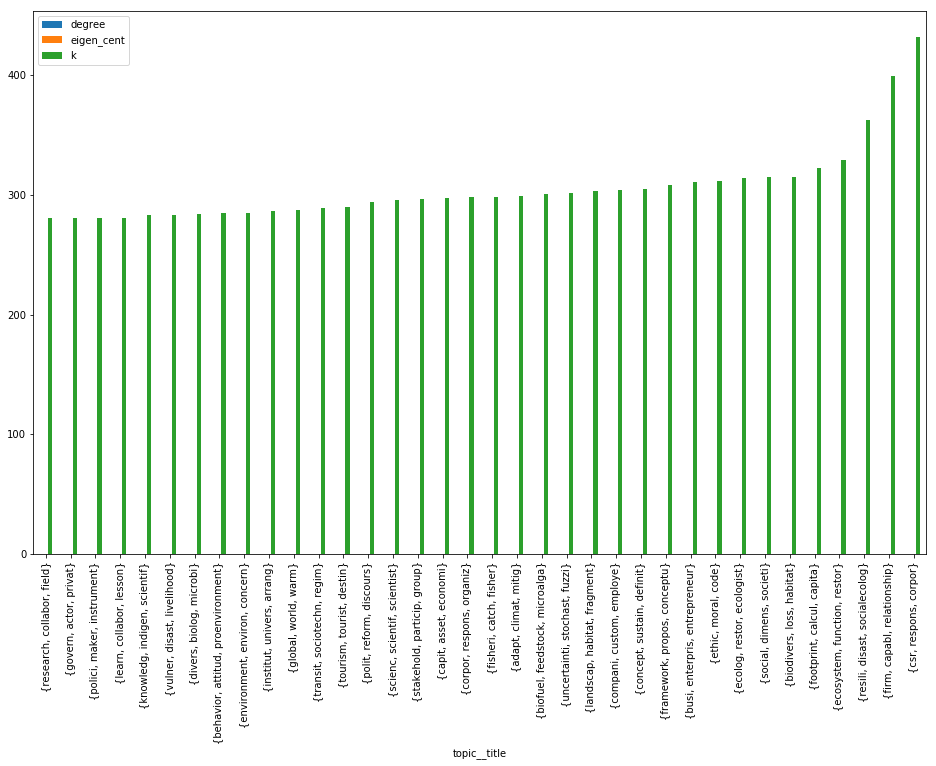

In [35]:
pdf = df.sort_values('k')

pdf = pdf[pdf['k'] > 280]
pdf = pdf.set_index('topic__title')

plt.rcParams["figure.figsize"] = [16,10]
pdf.plot.bar()
plt.show()